In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name="Data")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [23]:
X = df.drop(["Personal Loan", "ID"], axis=1)
y = df["Personal Loan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.985

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.90      0.93       105

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000


Confusion Matrix:
 [[890   5]
 [ 10  95]]


In [18]:
! git commit -m "first commit"

[main f46f139] first commit
 2 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Bank_Loan_Modeling/Bank_Personal_Loan_Modelling.xlsx
 create mode 100644 Bank_Loan_Modeling/notebook.ipynb


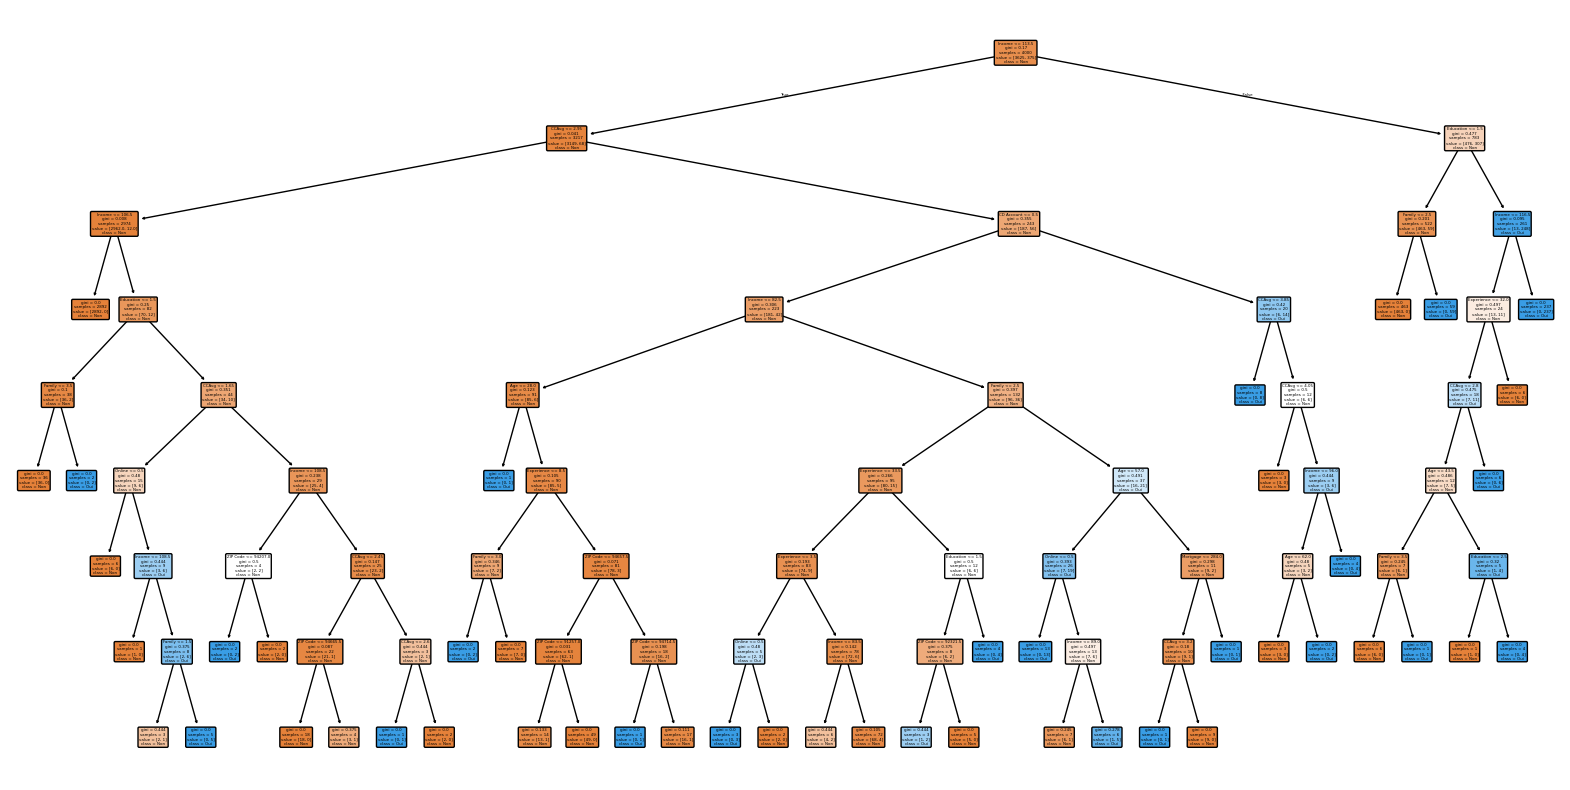

In [27]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Non", "Oui"], filled=True, rounded=True)
plt.show()

In [22]:
X.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [19]:
import pickle

In [28]:
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)